<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Concept%20drift%EC%97%90%20%EC%9D%98%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EC%84%B1%EB%8A%A5%20%EC%B6%94%EC%A0%95%20%EB%B0%A9%EB%B2%95_0710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

*   기계학습은 학습에 의해 모델을 구축한 후, Test dataset을 사용하여 N-fold class-validation으로 precision, recall, f1 및 MAPE, RMSE 등 성능을 측정한다.
*   통상, 측정된 성능값은 해당 모델을 대변하는 성능 지표가 된다.
*   이렇게 구축된 모델은 live data를 입력해서 실 활용하게 되는데, 이때 초기에 측정한 성능을 지속하여 확보하고 있는지 실측하여 알 수 없다.
*   Time-series data에 의한 Regression의 경우, 예측 기간의 도래 이후, 실측 Y값을 알 수 있으나 역시 업무에 따라 그 시간 간격이 크게 발생 할 수 있으며, classification의 경우, 예측 class가 정확한지 실측하기 위해서는 별도의 labeling 작업을 해야 한다.
*   즉, 한번 구축한 모델은 활용 단계에서 성능을 실측하는 것이 매우 어려우며, 비즈니스상에서 IT운영팀에서 이를 관리하는 것은 현실적으로 불가능 하다.
*   하지만, 비즈니스 상에서 모델의 활용 중에 성능이 저하된다면 의사결정 및 경영상의 문제를 초래 할 수 있다.
*   하여, concept drift의 통계량을 측정하여 모델의 성능 상태를 유추하는 연구들이 이루어져 왔다.
*   하지만, concept drift의 측정값 (통계량)을 통해 precision, recall, accuracy 등 직접적으로 성능을 예측하는 연구는 많지 않다.
*   이번 연구에서는 concept drift의 측정값 (통계량)을 통해 직접적으로 precision, recall, accuracy 등 성능을 예측하는 성능 예측 모델(PPM, Performance prediction model)을 제안한다.












# Proposed Method

1.   Feature의 importanc를 측정하는 Lime 알고리즘은 reference data를 기반으로 가상의 dataset을 임의 생성(permutation)하여 model.predict에 의한 결과 (Y)를 대조 분석하여 importance를 추정(실험의 시행에 따른 statistics에 해당) 한다.
2.   즉, dataset의 feature중 x1의 값이 변하여도 Y의 변동이 없다면 x1의 importance는 낮은 것이다. 
3.   실험 dataset에서 X1의 변동량 대비 Y의 변동량을 통계적으로 측정하여 importance를 추정하는 것이다.
4.  유사한 원리로 data drift  model performance (accuracy) 모델을 생성할 수 있을 것이다.
5.   즉, 전체 Trainset에서 N-fold class-validation의 개념으로 reference dataset과 inference dataset을 임의로 나누고, 
6. inference dataset에 permutation에 의해 x의 값을 변형하여 drift를 유도하고,
7. reference 의 feature x1 대비 inference의 feature x1의 drift statistics 을 측정하고 (이때, x2,x3… 모든 feature의 drift statistics 이 측정될 것임) 이때의 inference dataset의 accuracy를 측정하여 y값으로 설정하고
8.   각 feature의 drift statistics 를 x로 설정하여 regressio에 의해 modeling (학습) 한다.
9.   물론, trainset 내의 분포, 범위라는 한계성을 갖지만,  직접적인 model 성능 추정이 가능할 것이다.









## reference data에 대응하는 inference data를 sampling(복원추출)하고, permutation에 의해 drift 주입, feature의 drift statistics 로부터 직접 model의 성능을 추정한다.

### sudo code

In [ ]:
trainset : y=f(x)
base_score = Score of base model
sampling_range = 0.05~0.95
sigma_multiplier = 1
for n sampling_count:
    y_ref, y_inf, x_ref, x_inf = split(y, x, sampling_range)
    x_inf = permutation(x_inf,sigma_multiplier)
    inf_score = score(y_inf, predict(x_inf))
    if base_score > inf_score:
        x_drift_statistics,x_drift_p_value = drift(x, x_inf)
        scores.add(inf_score)
        feature_drift.add(x_drift_statistics * (1 if x_drift_p_value < 0.05 else 0))
        
perfomance_predict_model = train(scores, feature_drift)

x_live = Inference data from time1 to time2
x_live_drift_statistics,x_live_drift_p_value = drift(x, x_live)
predict_score = perfomance_predict_model(x_live_drift_statistics * (1 if x_live_drift_p_value < 0.05 else 0))

# 실험 계획

*   Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>

* 예측 알고리즘
> Random-forest 알고리즘<BR>
> Deep-learning 알고리즘

* 실험
> 2010년 data를 기준으로 모델 학습<BR>
>2011년~2017년의 데이터를 2010년 학습데이터의 건수 (8000건) 단위로 drift 측정
모델의 예측 성능과 실 성능을 비교<BR>

* 실험의 변수
> feature_count (order of importance) = 5, 8, 10<br>
> sampling_range = 0.05 ~ 0.95, 0.20 ~ 0.80, 0.40 ~ 0.60<BR>
> sigma_multiplier = 1, 2, 3<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>mean_absolute_error<br>
    >>root_mean_square_error<br>
    >>mean_absolute_percentage_error<br>
    >>R_square<br>


# 데이터 준비

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

np.random.seed(1337)

In [156]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [157]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [158]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [159]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [160]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [161]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [162]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [163]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [164]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [165]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [166]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [167]:
df_accepted.shape

(1341026, 86)

In [168]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [169]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [170]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [171]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [172]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [173]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [174]:
X = {}
Y = {}

In [175]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [176]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [177]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [178]:
X[2010].shape

(11497, 81)

In [179]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [180]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

# 예측 모델 준비

In [181]:
ML = {}
scaler = MinMaxScaler()

In [182]:
MODEL_TYPE = 'RF'  ## RF / DL

## deep learning 모델

In [183]:
import os.path 

def build_model_dl(year,x,y,epochs=5):
    #X_train, X_test, y_train, y_test = train_test_split(X[year], Y[year], test_size=0.2, random_state=42)
    X_train= scaler.fit_transform(x)
    #X_test = scaler.transform(X_test)
    y_train = get_one_hot(y,2)

    # building the model
    model = Sequential()
    model.add(Dense(units=78,activation='relu'))
    model.add(Dense(units=39,activation='relu'))
    model.add(Dense(units=19,activation='relu'))
    model.add(Dense(units=8,activation='relu'))
    model.add(Dense(units=4,activation='relu'))
    model.add(Dense(units=2,activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    weight_path = '/content/drive/MyDrive/Drift/model/ml_'+str(year)
    if os.path.exists(weight_path+'.index'):
        model.load_weights(weight_path)
        print('load weights from ',weight_path)
    else:
        model.fit(x=X_train, 
                y=y_train, 
                epochs=epochs,
                batch_size=512,
                verbose=1)
            #validation_data=(X_test, y_test), verbose=1)
        if year > 2000:
            model.save_weights(weight_path) 
            print('save weights to ',weight_path)
    return model

## random forest 모델

In [184]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [185]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

# EDA

In [186]:
y_ref, y_inf, x_ref, x_inf = train_test_split(Y[2010], X[2010], test_size=0.30, random_state=23543)
ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [187]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf,ML[2010].predict(scaler.transform(x_inf)),average='binary')

In [188]:
# https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

from scipy import stats
import sys
import math
if sys.version_info >= (3, 5):
    from math import gcd
else:
    from fractions import gcd

def ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]   
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)

    if ks_stat == minS:
        ks_stat = -ks_stat
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = stats.kstwobign.sf(en * abs(ks_stat))

    return ks_stat,p_value

In [189]:
# 

from scipy.stats import ks_2samp, kstest

def ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

# 실험

## 학습 및 기본 준비

In [190]:
y_ref, y_inf, x_ref, x_inf = train_test_split(Y[2010], X[2010], test_size=0.30, random_state=23543)

In [191]:
df_stat = pd.DataFrame({"mean":np.mean(x_inf,axis=0),"std":np.std(x_inf,axis=0)},index=COLUMNS)

In [192]:
df_stat['mean'][0]

10644.188405797102

In [193]:
ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [194]:
importances = ML[2010].feature_importances_

In [195]:
importances = importances/sum(importances)

In [196]:
l = []
for x,(c,i) in enumerate(zip(COLUMNS,importances)):
    l.append((c,i,x))
l.sort(key = lambda x: x[1],reverse=True)    

In [197]:
def getImportanceColumnNameTop(prefix="", top=5):
    return [prefix+w for w in np.asarray(l[0:top])[:,0]]

def getImportanceIndexTop(top=5):
    return [int(w) for w in np.asarray(l[0:top])[:,2]]    

In [198]:
it = getImportanceColumnNameTop(prefix="drift_",top=5)
it

['drift_recoveries',
 'drift_last_fico_range_high',
 'drift_last_pymnt_amnt',
 'drift_total_rec_late_fee',
 'drift_Y']

In [199]:
x = getImportanceIndexTop(top=5)
x

[15, 17, 16, 14, 80]

In [200]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf,ML[2010].predict(scaler.transform(x_inf)),average='binary')

In [201]:
base_score

(0.9759114583333334, 1.0, 0.9878088962108731, None)

## dataset에서의 Sampling 

In [215]:
from sklearn.model_selection import train_test_split
import random

def drift_sampling2(predict,sampling_sigma=0.95,permutaion_sigma=1,epoch = 100,toplist=[]):
    metric_a= []
    metric_b= []
    metric_c= []
    drift_data_ks_stats = []
    drift_data_ks_pvals = []
    drift_data_ks_stats_diff = []
    drift_data_ks_pvals_diff = []     
    drift_ratio1 = []
    drift_ratio2 = []
    for i in range(epoch):
        #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
        y_inf_d, _, x_inf_d, _ = train_test_split(y_ref, x_ref, train_size=random.uniform(1-sampling_sigma,sampling_sigma))
        #print(x_ref.shape, x_inf_d.shape)
        o_drift = ks_drift(x_ref, x_inf_d)
        #permutation for x_inf_d
        #for v in toplist:

        # 20%의 feature에 대하여 permutaion...
        for q in range(int(len(toplist)*0.2)):
            v = random.choice(toplist)
            x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])
        """
        for k in range(x_inf_d.shape[0]):
            for v in toplist:
                x_inf_d[k,v] = x_inf_d[k,v] + np.random.normal(0, df_stat['std'][v]*5, 1)[0]
        """
        acc = precision_recall_fscore_support(y_inf_d, predict(scaler.transform(x_inf_d)),average='binary')
        if base_score[0] > acc[0]:
            x_drift = ks_drift(x_ref, x_inf_d)
            sumo = np.sum((o_drift[toplist,0]))
            sumd = np.sum((x_drift[toplist,0]))
            #sump = np.sum(x_drift[:,1])
            drift_ratio1.append(o_drift[toplist,0])
            drift_ratio2.append(x_drift[toplist,0])
            print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f} sum:{sumd:.4f} {sumo:.4f} {sumo/sumd:.4f}", end="", flush=True)
            metric_a.append([acc[0]/base_score[0],acc[1]/base_score[1],acc[2]/base_score[2]])
            metric_b.append([(base_score[0] - acc[0]),(base_score[1] - acc[1]),(base_score[2] - acc[2])])
            metric_c.append([acc[0],acc[1],acc[2]])
            drift_data_ks_stats.append(x_drift[:,0])
            drift_data_ks_pvals.append(x_drift[:,1])
            #drift_data_ks_pvals.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) # x_drift[:,1])   
            #drift_data_ks_stats_diff.append(base_drift[:,0]*(1-base_drift[:,1]) - x_drift[:,0]*(1-x_drift[:,1]))
            drift_data_ks_pvals_diff.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) 

    metric_a = np.asarray(metric_a)
    metric_b = np.asarray(metric_b)
    metric_c = np.asarray(metric_c)        
    drift_data_ks_stats = np.asarray(drift_data_ks_stats)
    drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
    drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
    drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)  

    drift_ratio1 = np.asarray(drift_ratio1)
    drift_ratio2 = np.asarray(drift_ratio2)

    drift_ratio = []
    for s in range(len(toplist)):
        drift_ratio.append(sum(abs(drift_ratio2[:,s]))/sum(abs(drift_ratio1[:,s])))

    return  metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,y_ref.shape[0],mean(drift_ratio)


In [203]:
from sklearn.model_selection import train_test_split
import random

def drift_sampling3(predict,sampling_sigma=0.95,permutaion_sigma=1,epoch = 100,toplist=[]):
    metric_a= []
    metric_b= []
    metric_c= []
    drift_data_ks_stats = []
    drift_data_ks_pvals = []
    drift_data_ks_stats_diff = []
    drift_data_ks_pvals_diff = []     
    drift_ratio1 = []
    drift_ratio2 = []
    for i in range(epoch):
        #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
        y_inf_d, _, x_inf_d, _ = train_test_split(y_ref, x_ref, train_size=random.uniform(1-sampling_sigma,sampling_sigma))
        #o_drift = ks_drift(x_ref, x_inf_d)
        #permutation for x_inf_d
        #for v in toplist:
        #v = random.choice(toplist)
        #x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])
        """
        for k in range(x_inf_d.shape[0]):
            for v in toplist:
                x_inf_d[k,v] = x_inf_d[k,v] + np.random.normal(0, df_stat['std'][v]*5, 1)[0]
        """
        acc = precision_recall_fscore_support(y_inf_d, predict(scaler.transform(x_inf_d)),average='binary')
        #if base_score[0] > acc[0]:

        x_drift = ks_drift(x_ref, x_inf_d)
        #sumo = np.sum((o_drift[toplist,0]))
        #sumd = np.sum((x_drift[toplist,0]))
        #sump = np.sum(x_drift[:,1])
        #drift_ratio1.append(o_drift[toplist,0])
        #drift_ratio2.append(x_drift[toplist,0])
        print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f}", end="", flush=True)
        #metric_a.append([acc[0]/base_score[0],acc[1]/base_score[1],acc[2]/base_score[2]])
        #metric_b.append([(base_score[0] - acc[0]),(base_score[1] - acc[1]),(base_score[2] - acc[2])])
        metric_c.append([acc[0],acc[1],acc[2]])
        drift_data_ks_stats.append(x_drift[:,0])
        #drift_data_ks_pvals.append(x_drift[:,1])
        #drift_data_ks_pvals.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) # x_drift[:,1])   
        #drift_data_ks_stats_diff.append(base_drift[:,0]*(1-base_drift[:,1]) - x_drift[:,0]*(1-x_drift[:,1]))
        drift_data_ks_pvals_diff.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) 

    metric_a = np.asarray(metric_a)
    metric_b = np.asarray(metric_b)
    metric_c = np.asarray(metric_c)        
    drift_data_ks_stats = np.asarray(drift_data_ks_stats)
    drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
    drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
    drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)  
    """
    drift_ratio1 = np.asarray(drift_ratio1)
    drift_ratio2 = np.asarray(drift_ratio2)

    drift_ratio = []
    for s in range(len(toplist)):
        drift_ratio.append(sum(abs(drift_ratio2[:,s]))/sum(abs(drift_ratio1[:,s])))
    """
    return  metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,y_ref.shape[0],1.0


performance predict model

In [204]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import random

random.seed(42)


In [205]:
from keras import backend as K


def r2(y_true, y_pred):
    """
    # custom R2-score metrics for keras backend
    :param y_true: 실측 데이터
    :param y_pred: 모델에 의한 예측 데이테
    :return: R^2 value, 이 값이 높다고 (예:0.99)해서 예측 값이 정확 하다고 할 수 는 없음...
    """
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [206]:
class VerboseCallback(tf.keras.callbacks.Callback):
    """
    kerase.model.fit 함수에서, log 출력을 위한 callback
    """
    def __init__(self, epoch):
        self.epoch = epoch
        self.progress("learning:", 0, [])

    def progress(self, text, current=0, log=None):
        g = self.epoch - current
        f = 50 / self.epoch
        c = int(current * f)
        pg = ['=' for i in range(c)] + ['.' for i in range(50 - c)]
        print("\r" + str(text) + "{}/{}[{}]{}".format(current, self.epoch, ''.join(pg), ('' if log is None else log)),
              end="", flush=True)
        if self.epoch - current == 0:
            print("")

    def on_epoch_end(self, epoch, logs=None):
        self.progress("learning:", epoch + 1, logs)

In [207]:
from tensorflow.keras import initializers
import random

#ss = StandardScaler()
#dx = ss.fit_transform(dx)
"""
tf.keras.layers.Dense(dx.shape[1], activation='relu',
                    kernel_initializer=initializers.RandomNormal(stddev=0.4),
                    bias_initializer=initializers.Zeros()),
#tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(dx.shape[1]*8, activation='relu',
                    kernel_initializer=initializers.RandomNormal(stddev=0.4),
                    bias_initializer=initializers.Zeros()),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(dx.shape[1]*2, activation='relu',
                    kernel_initializer=initializers.RandomNormal(stddev=0.4),
                    bias_initializer=initializers.Zeros()),
#tf.keras.layers.Dropout(0.1),
"""

def train_model(iter,epochs=600):

    seed_everything()    

    model_c = tf.keras.Sequential([
        tf.keras.layers.Dense(dx.shape[1]*10, activation='relu', input_shape=(dx.shape[1],),
                              kernel_initializer=initializers.RandomNormal(mean=-(0.2+iter*0.001), stddev=0.3),
                              bias_initializer=initializers.Zeros()),
        #tf.keras.layers.LayerNormalization(),
        #tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu',
                              kernel_initializer=initializers.RandomNormal(mean=-(0.2+iter*0.001), stddev=0.3),
                              bias_initializer=initializers.Zeros()),
        #tf.keras.layers.LayerNormalization(),
        tf.keras.layers.Dense(1)
    ])

    # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    opt = optimizers.RMSprop(learning_rate=0.0001)
    model_c.compile(optimizer=opt,
                loss='mse',
                metrics=[r2])
    #print(model_c.summary())
    #hist = model_c.fit(dx, metric_c[:,0], validation_split=0.2, batch_size=400, epochs=epochs,shuffle=False,verbose=0,callbacks=[early_stop,VerboseCallback(epochs)]) #, callbacks=[es_callback])
    hist = model_c.fit(dx, metric_c[:,0], validation_split=0.2, 
                       batch_size=1200, epochs=epochs,shuffle=False,use_multiprocessing=False,
                       verbose=0,callbacks=[early_stop,VerboseCallback(epochs)]) #, callbacks=[es_callback])

    return hist, model_c

In [208]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)

In [209]:
def ensemble_train(ensemble_num=30, epochs=600, cut=0.90):
    models = []
    for i in range(ensemble_num):
        h,m = train_model(i,epochs)
        hist = pd.DataFrame(h.history)
        print(f"last val_r2:{hist.iloc[-1]['val_r2']}")
        if hist.iloc[-1]['val_r2'] > cut:
            models.append(m)
            df2 = predict_precision_for_PPM1([m])
            print(f"Iteration {i} ============================================================")
            result_statistics(df2)
            df2.plot(title=f'Iteration {i}', figsize=(20,5))
    return models

In [210]:
import math
from statistics import mean

def predict_precision_for_PPM1(models):

    batch_size = length
    # 2010년의 data를 기준으로 그 이후의 data 들...
    X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017],X[2018]))
    Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017],Y[2018]))

    batch = math.ceil(X2.shape[0]/batch_size)
    df = {}
    df['The precision of the model on real data'] = []
    df['Predicted precision'] = []

    predict = ML[2010].predict
    for i in range(batch):
        X3 = X2[i*batch_size:(i+1)*batch_size]
        Y3 = Y2[i*batch_size:(i+1)*batch_size]
        f1 = precision_recall_fscore_support(Y3, predict(scaler.transform(X3)),average='binary')
        X3_drift = ks_drift(x_ref,X3)
        X3_drift = X3_drift[:,0] * ([1 if a < 0.05 else 0 for a in X3_drift[:,1]]) 
        #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
        dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=COLUMNS)[itc]
        #dd = drift_scaler.transform(dd)
        #acc_c = mean([m.predict(ss.transform(dd))[0][0] for m in  models]) #model_c.predict(dd)[0]
        acc_c = mean([m.predict(dd)[0][0] for m in  models]) 

        print(f"{f1[0]} - {acc_c}")
        df['The precision of the model on real data'].append(f1[0])
        df['Predicted precision'].append(acc_c)

    df2 = pd.DataFrame(df)

    return df2

In [211]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def result_statistics(df2):
    MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
    MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
    MAPE = mean_absolute_percentage_error(df2['The precision of the model on real data'], df2['Predicted precision'])
    RMSE = np.sqrt(MSE)
    r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
    print('MAE',MAE)
    print('RMSE',RMSE)
    print('MAPE',MAPE)
    print('R2',r_2)
    #display adjusted R-squared
    #adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
    #print('adj R2',adj_r2)
    return MAE,RMSE,MAPE,r_2

## 실험1

In [212]:
import math
from statistics import mean

def predict_precision_for_PPM2(models):

    batch_size = length
    # 2010년의 data를 기준으로 그 이후의 data 들...
    X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017],X[2018]))
    Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017],Y[2018]))

    batch = math.ceil(X2.shape[0]/batch_size)
    df = {}
    df['The precision of the model on real data'] = []
    df['Predicted precision'] = []
    beta = 0
    predict = ML[2010].predict
    for i in range(batch):
        X3 = X2[i*batch_size:(i+1)*batch_size]
        Y3 = Y2[i*batch_size:(i+1)*batch_size]
        f1 = precision_recall_fscore_support(Y3, predict(scaler.transform(X3)),average='binary')
        X3_drift = ks_drift(x_ref,X3)
        X3_drift = X3_drift[:,0] * ([1 if a < 0.05 else 0 for a in X3_drift[:,1]]) 
        #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
        dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=COLUMNS)[itc]
        #dd = drift_scaler.transform(dd)
        #acc_c = mean([m.predict(ss.transform(dd))[0][0] for m in  models]) #model_c.predict(dd)[0]
        #acc_c = mean([m.predict(dd)[0][0] for m in  models]) 

        #print(dd.values)
        #print(dd.values/drift_ratio)
        
        acc_c = models.predict(dd.values/mdr)[0] 
        
        if beta == 0:
            beta = base_score[0] - acc_c
        acc_c = beta + acc_c
        
        print(f"{f1[0]} - {acc_c}")
        df['The precision of the model on real data'].append(f1[0])
        df['Predicted precision'].append(acc_c)

    df2 = pd.DataFrame(df)

    return df2

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'Y']
997/1000 acc:0.9723 1.0000 0.9860 sum:-0.3401 0.0028 -0.0083(455, 5)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              2020.
Date:                Sun, 10 Jul 2022   Prob (F-statistic):                   1.39e-305
Time:                        07:43:37   Log-Likelihood:                          91.601
No. Observations:                 455   AIC:                                     -173.2
Df Residuals:                     450   BIC:                                     -152.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                 

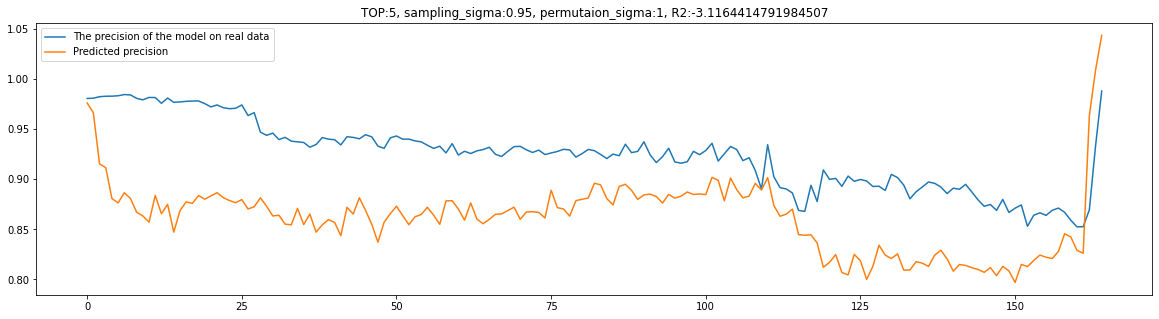

In [216]:
import statsmodels.api as sm # import statsmodels 

TOP = 5
sampling_sigma=0.95
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
print(itc)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdr = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 1000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))


In [61]:

TOP = 10
sampling_sigma=0.95
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
print(itc)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdr = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))


['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'Y', 'int_rate', 'term', 'fico_range_high', 'total_rec_int', 'loan_amnt']
35/10000 acc:0.9205 0.6582 0.7676 sum:-0.6547 0.0068 -0.0103

KeyboardInterrupt: ignored

In [ ]:

TOP = 30
sampling_sigma=0.95
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
print(itc)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdr = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))


In [ ]:

TOP = 5
sampling_sigma=0.95
permutaion_sigma=2

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length, mdr = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

In [ ]:

TOP = 5
sampling_sigma=0.95
permutaion_sigma=3

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdr = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

In [ ]:

TOP = 5
sampling_sigma=0.80
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdr = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

In [ ]:

TOP = 5
sampling_sigma=0.60
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdr = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

# 단순한 로직으로 다시... => 실패!

In [ ]:

TOP = 5
sampling_sigma=0.65
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdr = drift_sampling3(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)
"""
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))
"""

9937/10000 acc:0.9884 1.0000 0.9942(10, 5)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              18.68
Date:                Sat, 18 Jun 2022   Prob (F-statistic):                     0.00299
Time:                        06:23:29   Log-Likelihood:                         0.82162
No. Observations:                  10   AIC:                                      8.357
Df Residuals:                       5   BIC:                                      9.870
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


"\ndf2 = predict_precision_for_PPM2(model)\nMAE,RMSE,MAPE,r_2 = result_statistics(df2)\ndf2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))\n"

0.9893952421897392 - 0.9891125041240515
0.9883251657538196 - 0.4142371748196304
0.9861987960651887 - 0.2588844740448829
0.9869205057404447 - -0.9012220192441813
0.9838709677419355 - -0.760808392238982
0.9841036208419194 - -0.9371069561481382
0.9851549992723039 - -0.9680538912555525
0.9853792704111175 - -0.9508900383464334
0.9813245223387445 - -0.8429104427464107
0.9785178777393311 - -0.8661235816888821
0.9821351390289583 - -0.9076243640878114
0.9794871794871794 - -0.7279907947901667
0.977694090382387 - -0.6107574818101489
0.9798503166378814 - -0.5364575959870498
0.9756883421206796 - -0.4293960150240659
0.9780885108836673 - -0.37701461259504887
0.9779685264663805 - -0.4709533694198753
0.9782703172533681 - -0.21606230839427465
0.9775264815344976 - -0.24881489550724528
0.9753068592057762 - -0.10990084921410354
0.9750971642435584 - 0.025627851916076583
0.9749144811858609 - -0.05780305428587684
0.9758168993810278 - -0.30814975681925405
0.9740888382687927 - -0.33821498561496527
0.97339816933

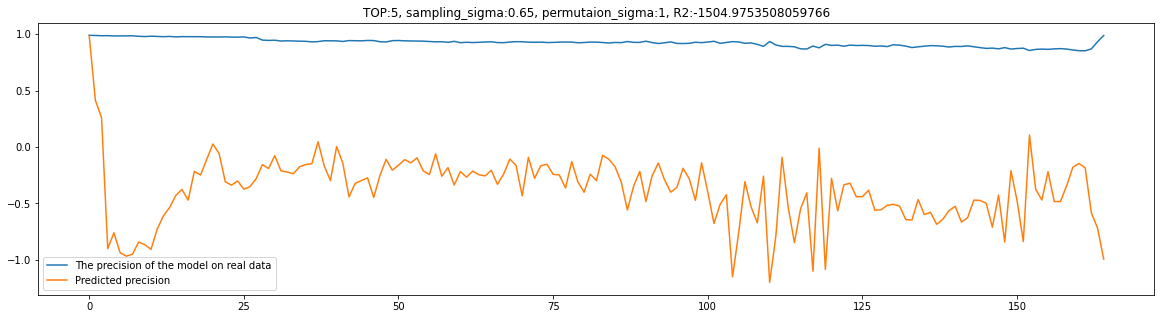

In [ ]:
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

# ks알고리즘의 변형에 대한 검증

In [ ]:
import statsmodels.api as sm # import statsmodels 

TOP = 5
sampling_sigma=0.95
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
print(itc)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdr = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

print("mdr:",mdr)



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'Y']
9998/10000 acc:0.9211 0.6585 0.7680 sum:0.4950 0.0062 0.0125(3984, 5)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.512e+05
Date:                Mon, 20 Jun 2022   Prob (F-statistic):                        0.00
Time:                        08:15:25   Log-Likelihood:                          4991.3
No. Observations:                3984   AIC:                                     -9973.
Df Residuals:                    3979   BIC:                                     -9941.
Df Model:                           5                                                  
Covariance Type:            nonrobust                

0.9928098935864251 - 0.9907468605419696
0.9943445475638051 - 0.9966891180014827
0.9930514488468362 - 1.0237030446482343
0.9928362573099415 - 1.0280783554568813
0.9935744172145846 - 1.041262027790325
0.9943486020226056 - 1.0429469324193255
0.9951484857394883 - 1.0384657202537455
0.9919848440687846 - 1.044168643660212
0.9888535031847133 - 1.0527402188506116
0.9882061735585324 - 1.0554976527820004
0.9875416485585977 - 1.0623284232487675
0.9869384239988517 - 1.050192751183686
0.9819610125109107 - 1.0565744760240623
0.9849537037037037 - 1.0524478298335296
0.9821612855668583 - 1.0640287553644776
0.9823367598088896 - 1.0538034204120774
0.9819017523700087 - 1.0488762323648821
0.9823974396275822 - 1.0505397265828966
0.9835805847616305 - 1.0463817314453503
0.9798346148266357 - 1.0510958175826501
0.9773481460106767 - 1.0478823054764144
0.9788208357183743 - 1.047537706582476
0.9762384792626728 - 1.0493069977878897
0.9760342368045649 - 1.0514883157582582
0.9756307339449541 - 1.0511528366386886
0.97

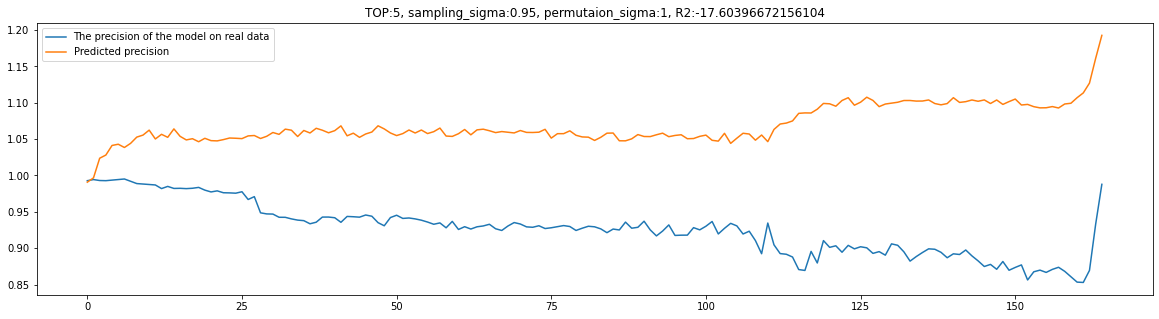

In [ ]:
df2 = predict_precision_for_PPM2(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

# 여기서 부터는 다른 데이터셋, 모델로 검증


https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions

https://www.kaggle.com/code/vadimabronin/notebookd76fc110c7

In [60]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [61]:
!kaggle datasets download "ealtman2019/credit-card-transactions"

 99% 261M/263M [00:08<00:00, 56.8MB/s]
100% 263M/263M [00:08<00:00, 33.3MB/s]


In [62]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [218]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [219]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

## 1/30 로 축소 한다.

In [220]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [221]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1}) 

In [222]:
df1 = df[df['Is Fraud?']==1]
df2 = df[df['Is Fraud?']==0]
df3 = df2.sample(int(df2.shape[0]/30))
df4 = pd.concat([df1,df3])

print("Compression rate:",df4.shape[0] / df.shape[0] )

df = df4

Compression rate: 0.034512832709364456


## 기타 등등 전처리

In [223]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

True     827559
False     14102
Name: Errors?, dtype: int64

In [224]:
df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

In [225]:

from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())  
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)     
df['Merchant State']=df['Merchant State'].fillna('NAN')    
df['Merchant City']=df['Merchant City'].fillna('NAN') 
df['is vozmes']=df['Amount'].apply(lambda value: value<0)  
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

In [226]:
#encoding categorial features
le=LabelEncoder() 
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])
le=LabelEncoder()
df['Errors?']=le.fit_transform(df['Errors?'])
le=LabelEncoder()
df['is online']=le.fit_transform(df['is online'])
le=LabelEncoder()
df['is vozmes']=le.fit_transform(df['is vozmes'])

In [227]:
df = df.sort_values(['Year','Month','Day'])

In [228]:
df.Year.value_counts()

2016    60153
2015    59864
2019    59774
2018    59355
2017    57959
2014    57071
2013    57066
2012    54913
2010    53297
2011    52445
2009    46000
2008    44256
2007    37311
2006    31340
2005    25046
2004    20600
2003    15819
2002    11935
2020    11322
2001     8978
2000     6166
1999     3995
1998     2669
1997     1633
1996     1029
1995      672
1994      466
1993      292
1992      188
1991       47
Name: Year, dtype: int64

In [229]:
drop_columns = ['Is Fraud?','Zip','Year','Month','Day','Minutes','User','Errors?','Merchant Name','Merchant City','Merchant State']
X = df[df['Year']==2007].drop(drop_columns,axis=1)
y = df[df['Year']==2007]['Is Fraud?']

In [230]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37311 entries, 23694722 to 11264665
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Card        37311 non-null  int64  
 1   Amount      37311 non-null  float64
 2   Use Chip    37311 non-null  int64  
 3   MCC         37311 non-null  int64  
 4   is online   37311 non-null  int64  
 5   Hour        37311 non-null  int64  
 6   is vozmes   37311 non-null  int64  
 7   abs_amount  37311 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


In [231]:
y_ref, y_inf, x_ref, x_inf = train_test_split(y.values, X.values, test_size=0.30, random_state=23543)

In [78]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 96 kB/s 


In [232]:
#cat boost classifier

from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_ref, y_ref,plot=True) 
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.041492
0:	learn: 0.6179802	total: 8.68ms	remaining: 8.67s
1:	learn: 0.5563019	total: 13.8ms	remaining: 6.91s
2:	learn: 0.5010605	total: 19ms	remaining: 6.32s
3:	learn: 0.4538280	total: 24ms	remaining: 5.97s
4:	learn: 0.4122384	total: 28.9ms	remaining: 5.75s
5:	learn: 0.3753976	total: 34.7ms	remaining: 5.74s
6:	learn: 0.3456757	total: 40ms	remaining: 5.67s
7:	learn: 0.3184703	total: 45.7ms	remaining: 5.67s
8:	learn: 0.2955169	total: 51.1ms	remaining: 5.63s
9:	learn: 0.2752873	total: 56.5ms	remaining: 5.6s
10:	learn: 0.2571467	total: 62.1ms	remaining: 5.59s
11:	learn: 0.2413202	total: 67.2ms	remaining: 5.53s
12:	learn: 0.2275438	total: 72.4ms	remaining: 5.5s
13:	learn: 0.2152824	total: 86.8ms	remaining: 6.12s
14:	learn: 0.2080237	total: 94.1ms	remaining: 6.18s
15:	learn: 0.1983689	total: 99.2ms	remaining: 6.1s
16:	learn: 0.1900009	total: 104ms	remaining: 6.03s
17:	learn: 0.1823084	total: 109ms	remaining: 5.96s
18:	learn: 0.1749382	total: 115ms	remaining: 5.93s
19:	

In [233]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(y_inf, y_pred)) 
print(roc_auc_score(y_inf, y_pred))

0.6901709401709403
0.78358273449579


In [315]:
mean_drift = ks_drift(x_ref, x_inf)

In [318]:
mean_drift[3,0], mean_drift[5,0]

(0.007827836677475525, -0.007528216728765302)

In [234]:
df1 = df[df['Year'] >= 2008]
df2 = df1[df1['Year'] <= 2009]

X_test2 = df2[df2['Year'] >= 2008].drop(drop_columns,axis=1)
y_test2 = df2[df2['Year'] >= 2008]['Is Fraud?']

In [235]:
import math
f1s = {}
f1s['p'] = []
f1s['r'] = []
f1s['f'] = []
f1s['d_MCC'] = []
f1s['d_HOUR'] = []
f1s['d_MCC_abs'] = []
f1s['d_HOUR_abs'] = []
window_size = 10000
step = 500
batch = math.ceil((X_test2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X_test2[i*step:i*step+window_size]
    uy = y_test2[i*step:i*step+window_size]
    y_pred=cat.predict(ux)
    #ppy = [1 if m=='No' else 0 for m in y_pred]   
    f1 = precision_recall_fscore_support(uy, y_pred,average='binary') #precision_recall_fscore_support([1 if m=='No' else 0 for m in uy], ppy,average='binary')
    o_drift = ks_drift(x_ref, ux.values)

    print(f"p:{f1[0]:.4f} {o_drift[3,0]} \n{uy.value_counts()}")
    f1s['p'].append(f1[0])
    f1s['r'].append(f1[1])
    f1s['f'].append(f1[2])
    f1s['d_MCC'].append(o_drift[3,0])
    f1s['d_HOUR'].append(o_drift[5,0])
    f1s['d_MCC_abs'].append(abs(o_drift[3,0]))
    f1s['d_HOUR_abs'].append(abs(o_drift[5,0]))        

p:0.9094 0.008547222115863229 
0    9265
1     735
Name: Is Fraud?, dtype: int64
p:0.9055 0.006547222115863227 
0    9280
1     720
Name: Is Fraud?, dtype: int64
p:0.9101 -0.0054731707317072775 
0    9288
1     712
Name: Is Fraud?, dtype: int64
p:0.9118 -0.006086074204541103 
0    9307
1     693
Name: Is Fraud?, dtype: int64
p:0.9104 -0.008873170731707236 
0    9296
1     704
Name: Is Fraud?, dtype: int64
p:0.9065 -0.00957317073170727 
0    9294
1     706
Name: Is Fraud?, dtype: int64
p:0.9015 -0.010273170731707304 
0    9303
1     697
Name: Is Fraud?, dtype: int64
p:0.9079 -0.011073170731707216 
0    9262
1     738
Name: Is Fraud?, dtype: int64
p:0.9132 -0.013673170731707263 
0    9241
1     759
Name: Is Fraud?, dtype: int64
p:0.9151 -0.013949749205498296 
0    9246
1     754
Name: Is Fraud?, dtype: int64
p:0.9165 -0.015486074204541123 
0    9215
1     785
Name: Is Fraud?, dtype: int64
p:0.9156 -0.0166860742045411 
0    9219
1     781
Name: Is Fraud?, dtype: int64
p:0.9220 -0.01798607

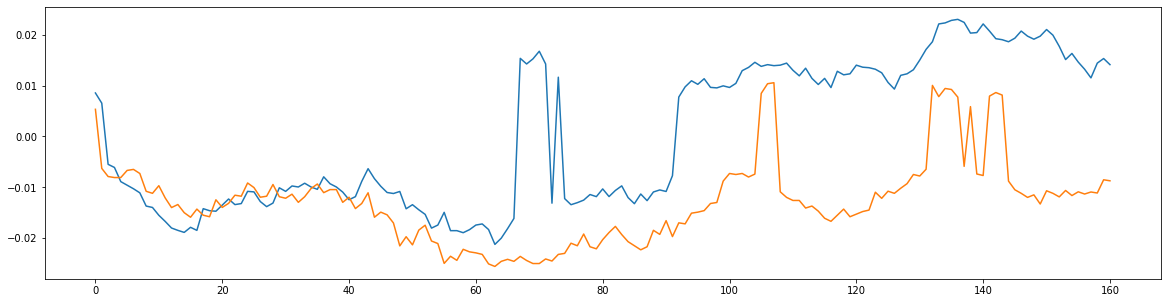

In [236]:
plt.figure(figsize=(20,5))
pps = pd.DataFrame(f1s)
#pps['p'].plot(figsize=(20,5))
pps['d_MCC'].plot(figsize=(20,5))
pps['d_HOUR'].plot(figsize=(20,5))
#pps['d_MCC_abs'].plot(figsize=(20,5))
#pps['d_HOUR_abs'].plot(figsize=(20,5))

In [237]:
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

base_score = precision_recall_fscore_support(y_inf, y_pred,average='binary')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10629
           1       0.87      0.57      0.69       565

    accuracy                           0.97     11194
   macro avg       0.92      0.78      0.84     11194
weighted avg       0.97      0.97      0.97     11194



In [238]:
base_score

(0.8706199460916442, 0.5716814159292035, 0.6901709401709403, None)

In [239]:
COLUMNS = X.columns

In [240]:
COLUMNS

Index(['Card', 'Amount', 'Use Chip', 'MCC', 'is online', 'Hour', 'is vozmes',
       'abs_amount'],
      dtype='object')

In [241]:
importances = cat.feature_importances_

In [242]:
importances = importances/sum(importances)

l = []
for x,(c,i) in enumerate(zip(COLUMNS,importances)):
    l.append((c,i,x))
l.sort(key = lambda x: x[1],reverse=True)    

In [243]:
l

[('MCC', 0.3739186282902168, 3),
 ('Hour', 0.23507039124029877, 5),
 ('abs_amount', 0.10304294732303927, 7),
 ('Use Chip', 0.08279610221865151, 2),
 ('is online', 0.07597229821225618, 4),
 ('Amount', 0.07594389436881385, 1),
 ('Card', 0.03874180524931327, 0),
 ('is vozmes', 0.01451393309741021, 6)]

In [244]:
df_stat = pd.DataFrame({"mean":np.mean(x_ref,axis=0),"std":np.std(x_ref,axis=0)},index=COLUMNS)

In [309]:
from sklearn.model_selection import train_test_split
import random

def drift_sampling4(predict,sampling_sigma=0.95,permutaion_sigma=1,epoch = 100,toplist=[]):
    metric_a= []
    metric_b= []
    metric_c= []
    drift_data_ks_stats = []
    drift_data_ks_pvals = []
    drift_data_ks_stats_diff = []
    drift_data_ks_pvals_diff = []     
    drift_ratio1 = []
    drift_ratio2 = []
    acc_ratio1 = []
    acc_ratio2 = []    
    for i in range(epoch):
        #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
        y_inf_d, _, x_inf_d, _ = train_test_split(y_ref, x_ref, train_size=random.uniform(1-sampling_sigma,sampling_sigma))
        #print(x_ref.shape, x_inf_d.shape)
        o_drift = ks_drift(x_ref[:,top_list], x_inf_d[:,top_list])
        o_acc = precision_recall_fscore_support(y_inf_d, predict(x_inf_d),average='binary')
        #permutation for x_inf_d
        #for v in toplist:

        # 20%의 feature에 대하여 permutaion...
        #for q in range(int(len(toplist)*0.2)):
        
        v = random.choice(toplist)
        x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])
        """
        for k in range(x_inf_d.shape[0]):
            for v in toplist:
                x_inf_d[k,v] = x_inf_d[k,v] + np.random.normal(0, df_stat['std'][v]*5, 1)[0]
        """
        acc = precision_recall_fscore_support(y_inf_d, predict(x_inf_d),average='binary')
        #print(acc)
        if base_score[0] > acc[0]:
            x_drift = ks_drift(x_ref[:,top_list], x_inf_d[:,top_list])
            sumo = np.sum((o_drift[:,0]))
            sumd = np.sum((x_drift[:,0]))
            #sump = np.sum(x_drift[:,1])
            drift_ratio1.append(o_drift[:,0])
            drift_ratio2.append(x_drift[:,0])

            acc_ratio1.append(o_acc[0])
            acc_ratio2.append(acc[0])

            print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f} sum:{sumd:.4f} {sumo:.4f} {sumo/sumd:.4f} cnt:{x_ref.shape[0]} / {x_inf_d.shape[0]}", end="", flush=True)
            metric_a.append([acc[0]/base_score[0],acc[1]/base_score[1],acc[2]/base_score[2]])
            metric_b.append([(o_acc[0] - acc[0]),(o_acc[1] - acc[1]),(o_acc[2] - acc[2])])
            metric_c.append([acc[0],acc[1],acc[2]])
            drift_data_ks_stats.append(x_drift[:,0])
            drift_data_ks_pvals.append(o_drift[:,0] - x_drift[:,0])
            #drift_data_ks_pvals.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) # x_drift[:,1])   
            #drift_data_ks_stats_diff.append(base_drift[:,0]*(1-base_drift[:,1]) - x_drift[:,0]*(1-x_drift[:,1]))
            drift_data_ks_pvals_diff.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) 

    metric_a = np.asarray(metric_a)
    metric_b = np.asarray(metric_b)
    metric_c = np.asarray(metric_c)        
    drift_data_ks_stats = np.asarray(drift_data_ks_stats)
    drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
    drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
    drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)  

    drift_ratio1 = np.asarray(drift_ratio1)
    drift_ratio2 = np.asarray(drift_ratio2)

    drift_ratio = []
    for s in range(len(toplist)):
        drift_ratio.append((mean(abs(drift_ratio1[:,s])),mean(abs(drift_ratio2[:,s]))))

    accr = (mean(acc_ratio1),mean(acc_ratio2))

    return  metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,y_ref.shape[0], drift_ratio, accr


In [310]:
TOP = 2
sampling_sigma=0.95
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
print(itc)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length,mdrp,accr = drift_sampling4(cat.predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 1000,toplist=top_list)


['MCC', 'Hour']
994/1000 acc:0.2413 0.4529 0.3148 sum:0.2443 -0.0001 -0.0004 cnt:26117 / 19184

In [311]:
# delta of precision
metric_b[:,0]

array([0.71012314, 0.66779117, 0.73850452, 0.70147885, 0.70591525,
       0.04630757, 0.69800874, 0.69781469, 0.04702908, 0.7079986 ,
       0.7010948 , 0.07384483, 0.684694  , 0.71274194, 0.69050855,
       0.75286961, 0.68795083, 0.67294326, 0.6990315 , 0.69976461,
       0.68706285, 0.70630613, 0.70988924, 0.68772894, 0.6732384 ,
       0.71065125, 0.71785169, 0.69178234, 0.70582078, 0.69657901,
       0.68819273, 0.70077884, 0.67628423, 0.70300462, 0.6996317 ,
       0.68504891, 0.70007145, 0.71089909, 0.69660527, 0.70203509,
       0.71083591, 0.70883728, 0.7021702 , 0.70358223, 0.69975883,
       0.69216025, 0.70460749, 0.7111664 , 0.70678288, 0.73796706,
       0.73619675, 0.71789704, 0.70083745, 0.70604688, 0.69958907,
       0.70479685, 0.67792592, 0.69787828, 0.70809914, 0.73224955,
       0.69484826, 0.70479825, 0.02191114, 0.71846452, 0.70295157,
       0.71796713, 0.70655139, 0.70215286, 0.70782486, 0.70779968,
       0.664786  , 0.69481462, 0.71029496, 0.70338717, 0.68722

In [312]:
# delta of drift
drift_data_ks_pvals

array([[-0.24230247,  0.        ],
       [-0.2398872 ,  0.        ],
       [-0.24548705,  0.        ],
       ...,
       [-0.24455134,  0.        ],
       [-0.24083449,  0.        ],
       [-0.2443637 ,  0.        ]])

In [313]:
model = sm.OLS(metric_b[:,0], drift_data_ks_pvals).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.109e+05
Date:                Sun, 10 Jul 2022   Prob (F-statistic):                        0.00
Time:                        08:59:31   Log-Likelihood:                          1180.4
No. Observations:                 512   AIC:                                     -2357.
Df Residuals:                     510   BIC:                                     -2348.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [268]:
min(drift_data_ks_stats[:,0]), max(drift_data_ks_stats[:,0])

(-0.010959865450478556, 0.26381205085857684)

In [274]:
mdrp

[(0.005820991767704826, 0.2386854123068117),
 (0.005622777629872937, 0.007422270810867105)]

In [284]:
mdrpp = [mdrp[0][1] / mdrp[0][0], mdrp[1][1] / mdrp[1][0]]
mdrpp

[41.00425182372721, 1.3200363413686758]

In [283]:
accr

(0.9448400603189702, 0.25399250154934966)

In [285]:
accrp = accr[1] / accr[0]
accrp

0.26882063136019435

In [279]:

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS[top_list])
dx = trainset #.values #[itc]
print(dx.shape)

(512, 2)


In [304]:
import statsmodels.api as sm # import statsmodels 
#mms = MinMaxScaler()
#model = sm.OLS(metric_c[:,0], mms.fit_transform(dx)).fit() ## sm.OLS(output, input)
model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9213.
Date:                Sun, 10 Jul 2022   Prob (F-statistic):                        0.00
Time:                        08:48:50   Log-Likelihood:                          877.71
No. Observations:                 512   AIC:                                     -1751.
Df Residuals:                     510   BIC:                                     -1743.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [321]:
import math
from statistics import mean

def predict_precision_for_PPM3(models):

    df = {}
    df['The precision of the model on real data'] = []
    df['Predicted precision'] = []
    beta = 0
    predict = cat.predict

    window_size = 10000
    step = 500
    batch = math.ceil((X_test2.shape[0]-window_size)/step)
    for i in range(batch):
        ux = X_test2[i*step:i*step+window_size].values
        uy = y_test2[i*step:i*step+window_size].values

        f1 = precision_recall_fscore_support(uy, predict(ux),average='binary')
        X3_drift = ks_drift(x_ref[:,top_list],ux[:,top_list])
        X3_drift = mean_drift[top_list,0] - X3_drift[:,0]

        #X3_drift = X3_drift[:,0] * ([1 if a < 0.05 else 0 for a in X3_drift[:,1]]) 
        #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
        dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=COLUMNS[top_list])[itc]
        #dd = drift_scaler.transform(dd)
        #acc_c = mean([m.predict(ss.transform(dd))[0][0] for m in  models]) #model_c.predict(dd)[0]
        #acc_c = mean([m.predict(dd)[0][0] for m in  models]) 

        #print(dd.values)
        #print(dd.values/drift_ratio)
        
        acc_c = models.predict(dd.values)[0]
        """
        if beta == 0:
            beta = base_score[0] - acc_c
        """
        acc_c = base_score[0] - acc_c
        
        print(f"{f1[0]} - {acc_c}")
        df['The precision of the model on real data'].append(f1[0])
        df['Predicted precision'].append(acc_c)

    df2 = pd.DataFrame(df)

    return df2

mdr: 20.68111712738165
0.9094138543516874 - 0.8744273404866286
0.9054545454545454 - 0.8749064138047551
0.9100917431192661 - 0.9090007640732252
0.9118198874296435 - 0.910684959714543
0.9104477611940298 - 0.9187601017298375
0.9065420560747663 - 0.9214293550803763
0.9015151515151515 - 0.9235490757699674
0.907942238267148 - 0.9255005857058303
0.9131944444444444 - 0.9314308435016749
0.9150779896013865 - 0.9320490054181397
0.9165275459098498 - 0.9371871637570952
0.9155629139072847 - 0.9395648959999421
0.921996879875195 - 0.942461333315246
0.9274691358024691 - 0.9440795197408532
0.9244372990353698 - 0.9445057420478369
0.9204545454545454 - 0.9411962612481741
0.9219512195121952 - 0.9436673702451425
0.9134125636672326 - 0.9307645585340436
0.9155629139072847 - 0.9317861078903874
0.9159369527145359 - 0.9336015619828669
0.9166666666666666 - 0.9294378485919399
0.9188741721854304 - 0.926327406134496
0.9176090468497576 - 0.9302471807834402
0.919672131147541 - 0.929576125745825
0.921311475409836 - 0.92

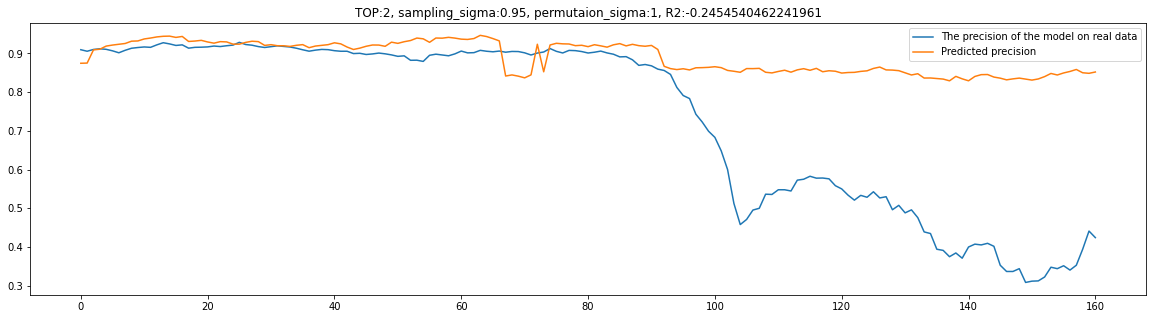

In [322]:

print("mdr:",mdr)
df2 = predict_precision_for_PPM3(model)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))


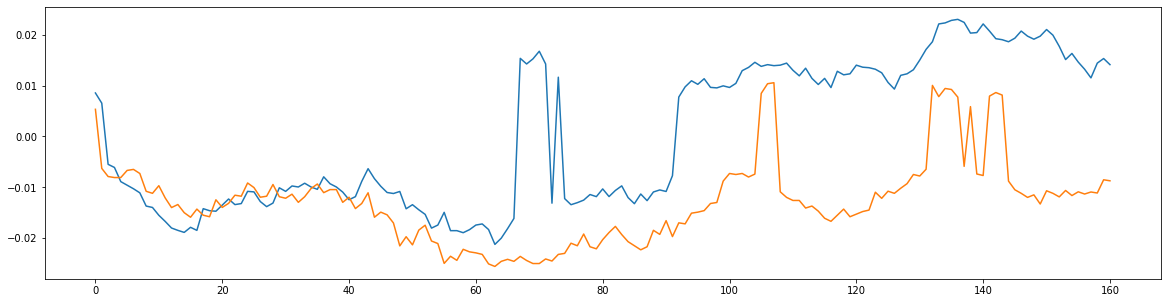

In [253]:
pps['d_MCC'].plot(figsize=(20,5))
pps['d_HOUR'].plot(figsize=(20,5))